# LetsGrowMore - Data Science Intern
## Author: Adil Anwar
## Task 2 : Stock Market Prediction And Forecasting Using Stacked LSTM
## Level : Beginner
## Language : Python

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df=df.reset_index()['Close']

In [5]:
df.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [6]:
df.shape

(2035,)

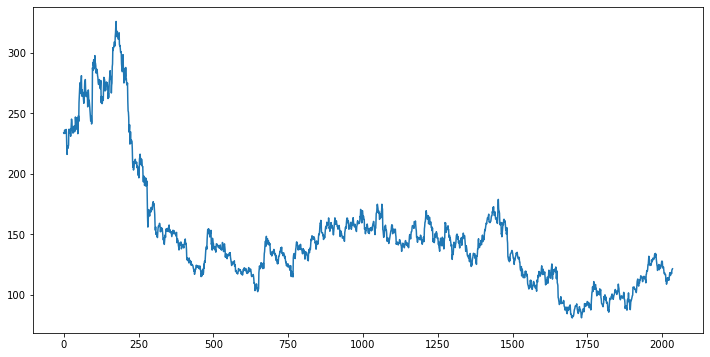

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df)

###### Preprocessing

In [8]:
scaler=MinMaxScaler(feature_range=(0, 1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [9]:
df

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [10]:
len(df)

2035

In [11]:
# 70% Train Size,  30% Test Size

In [12]:
train_size=int(len(df)*0.7)
train_data=df[0:train_size,:]
test_data=df[train_size:len(df),:1]

In [14]:
len(train_data)

1424

In [15]:
len(test_data)

611

In [16]:
def create_features(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):# range(0,len(dataset)-time_step-1)
        a=dataset[i:(i+time_step), 0]        # i=0 timestep=100 
        dataX.append(a)                      # 0 to 99 will go in X
        dataY.append(dataset[i + time_step, 0])# 100 will go in Y
    return np.array(dataX), np.array(dataY)    

In [17]:
ts=100
x_train,y_train=create_features(train_data, ts)
x_test,y_test=create_features(test_data, ts)

In [18]:
x_train.shape

(1323, 100)

In [20]:
x_train.shape[0]

1323

In [21]:
x_train.shape[1]

100

In [22]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], 1) # Converting 2D to 3D
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [23]:
print(x_train.shape)

(1323, 100, 1)


In [24]:
print(y_train.shape)

(1323,)


In [26]:
model=Sequential()# Iniliaze an empty Neural Network
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # Hideen layer=50   x_train shape=(100,1)
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train,y_train,batch_size=64,epochs=100,verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
21/21 [==============================] - 9s 200ms/step - loss: 0.0340 - val_loss: 0.0037
Epoch 2/100
21/21 [==============================] - 3s 161ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 3/100
21/21 [==============================] - 3s 161ms/step - loss: 0.0016 - val_loss: 9.1873e-04
Epoch 4/100
21/21 [==============================] - 3s 160ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 5/100
21/21 [==============================] - 3s 160ms/step - loss: 0.0014 - val_loss: 8.3267e-04
Epoch 6/100
21/21 [==============================] - 3s 159ms/step - loss: 0.0013 - val_loss: 9.0381e-04
Epoch 7/100
21/21 [==============================] - 3s 159ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
21/21 [==============================] - 3s 159ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/100
21/21 [==============================] - 3s 157ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/100
21/21 [==============================] - 3s 158ms/step - loss: 0.0

In [29]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [30]:
train_predict

array([[0.843369  ],
       [0.8551461 ],
       [0.84384286],
       ...,
       [0.3400921 ],
       [0.3448395 ],
       [0.33732912]], dtype=float32)

In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
np.sqrt(mean_squared_error(y_train,train_predict))

164.56810345992227

In [33]:
np.sqrt(mean_squared_error(y_test,test_predict))

108.23218720255181

#### Plotting the graph according to train and test data

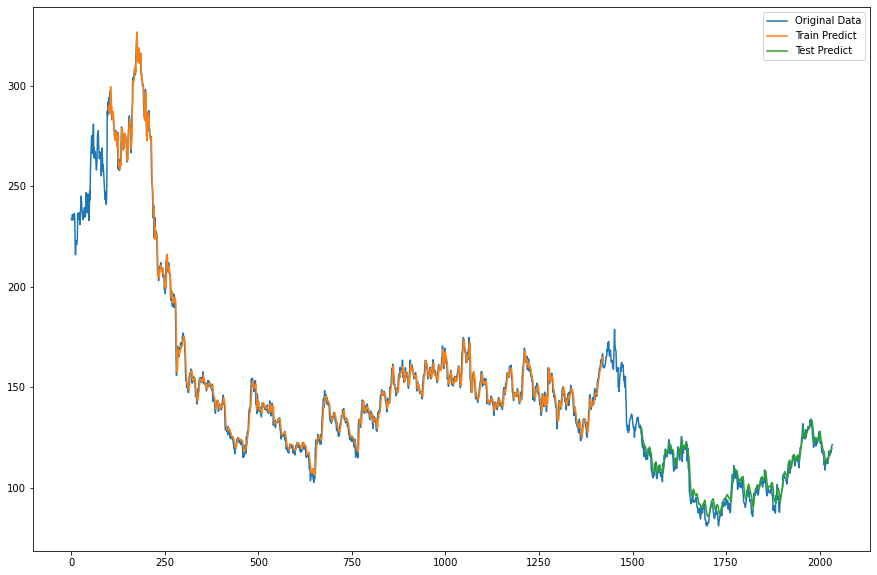

In [37]:
plt.figure(figsize=(15,10))
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original Data','Train Predict','Test Predict'])
plt.show()

In [38]:
len(test_data)

611

In [40]:
611-100 # To predict for a 1 jan we need previoud 100 days data
# So to predict for new values we need previous 100 records

511

In [42]:
len(test_data[511:])

100

In [43]:
x_input=test_data[511:].reshape(1,-1)

In [44]:
x_input.shape

(1, 100)

In [45]:
temp_input=list(x_input)
temp_input

[array([0.12479575, 0.13848039, 0.14011438, 0.13888889, 0.13541667,
        0.14011438, 0.1380719 , 0.13071895, 0.13071895, 0.12867647,
        0.11846405, 0.14644608, 0.14808007, 0.15910948, 0.15992647,
        0.15788399, 0.16441993, 0.17892157, 0.17933007, 0.19260621,
        0.20812908, 0.18974673, 0.18055556, 0.18239379, 0.17708333,
        0.17810458, 0.18055556, 0.17810458, 0.17851307, 0.19607843,
        0.18913399, 0.18954248, 0.19403595, 0.19444444, 0.20200163,
        0.19771242, 0.19934641, 0.19873366, 0.1997549 , 0.2128268 ,
        0.21568627, 0.20445261, 0.21772876, 0.21098856, 0.21425654,
        0.19750817, 0.18811275, 0.17851307, 0.17381536, 0.16033497,
        0.16564542, 0.17116013, 0.17422386, 0.18035131, 0.17401961,
        0.16278595, 0.16973039, 0.17810458, 0.17034314, 0.16830065,
        0.17279412, 0.17544935, 0.18382353, 0.19138072, 0.18913399,
        0.19097222, 0.17238562, 0.16830065, 0.1693219 , 0.17177288,
        0.16156046, 0.14971405, 0.1503268 , 0.15

In [46]:
temp_input[0]

array([0.12479575, 0.13848039, 0.14011438, 0.13888889, 0.13541667,
       0.14011438, 0.1380719 , 0.13071895, 0.13071895, 0.12867647,
       0.11846405, 0.14644608, 0.14808007, 0.15910948, 0.15992647,
       0.15788399, 0.16441993, 0.17892157, 0.17933007, 0.19260621,
       0.20812908, 0.18974673, 0.18055556, 0.18239379, 0.17708333,
       0.17810458, 0.18055556, 0.17810458, 0.17851307, 0.19607843,
       0.18913399, 0.18954248, 0.19403595, 0.19444444, 0.20200163,
       0.19771242, 0.19934641, 0.19873366, 0.1997549 , 0.2128268 ,
       0.21568627, 0.20445261, 0.21772876, 0.21098856, 0.21425654,
       0.19750817, 0.18811275, 0.17851307, 0.17381536, 0.16033497,
       0.16564542, 0.17116013, 0.17422386, 0.18035131, 0.17401961,
       0.16278595, 0.16973039, 0.17810458, 0.17034314, 0.16830065,
       0.17279412, 0.17544935, 0.18382353, 0.19138072, 0.18913399,
       0.19097222, 0.17238562, 0.16830065, 0.1693219 , 0.17177288,
       0.16156046, 0.14971405, 0.1503268 , 0.15196078, 0.14726

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

### Predicting values for next 30 days

In [48]:
lst_output=[]
n_steps=100
i=0
while(i<30): # For 30 days prediction    ## if i<100 100 days prediction
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16588718]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [52]:
len(lst_output)

30

In [55]:
day_new=np.arange(1,101)# 1 to 101-->Previous 100 days indexes
day_pred=np.arange(101,131)# 101 to 131-->Predicted 30 days indexes

In [54]:
len(df)

2035

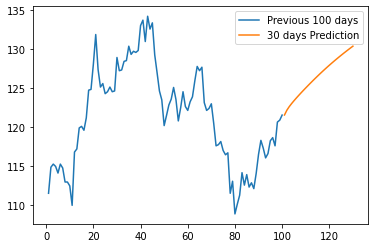

In [67]:
plt.plot(day_new,scaler.inverse_transform(df[1935:])) # 2035-100--> 1935 previous 100 days
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(['Previous 100 days','30 days Prediction'])

In [57]:
df_total=df.tolist()
df_total.extend(lst_output)

In [58]:
len(df_total)

2065

In [59]:
# 2035 + 30 days prtediction --> 2065 

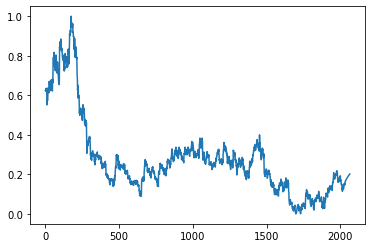

In [64]:
# Full graph--> Original data + 30 days Prediction
plt.plot(df_total) 


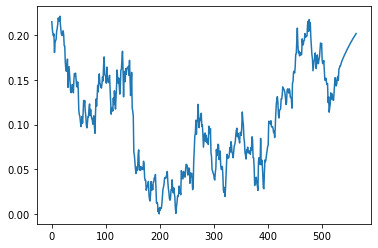

In [65]:
plt.plot(df_total[1500:])

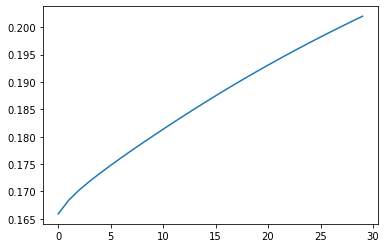

In [66]:
plt.plot(df_total[2035:]) # 30 days prediction

### Predicting values for next 100 days

In [69]:
lst_output=[]
n_steps=100
i=0
while(i<100): # For 100 days prediction    ## if i<30 --> 30 days prediction
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.18913399 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242
 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261
 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307
 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059
 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327
 0.14971405 0.1621732  0.16319444 0.16584967 0.16588718 0.16838339
 0.17025168 0.17185485 0.17334181 0.17476332 0.17613921 0.17748082
 0.17879593 0.18008967 0.18136477 0.18262234 0.18386225 0.1850841
 0.18628708 0.18747045 0.18863386 0.18977706 0.1908

In [70]:
day_new1=np.arange(1,101)# 1 to 101-->Previous 100 days indexes
day_pred1=np.arange(101,201)# 101 to 201-->Predicted 100 days indexes

In [71]:
len(df)

2035

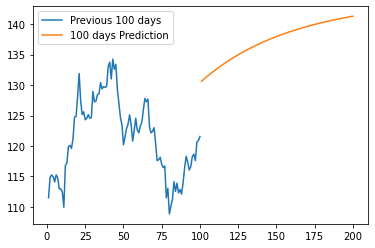

In [72]:
plt.plot(day_new1,scaler.inverse_transform(df[1935:])) # 2035-100--> 1935 previous 100 days
plt.plot(day_pred1,scaler.inverse_transform(lst_output))
plt.legend(['Previous 100 days','100 days Prediction'])

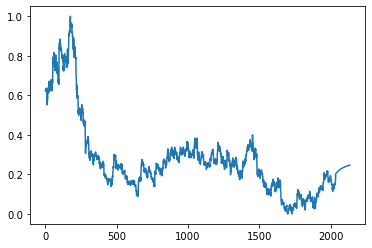

In [78]:
# Full graph--> Original data + 100 days Prediction
df2=df.tolist()
df2.extend(lst_output)
plt.plot(df2)

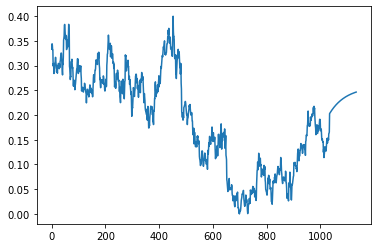

In [79]:
plt.plot(df2[1000:])